# Data Exploration

In [1]:
import numpy as np

import pandas as pd
import pandas_datareader.data as web 

% matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc 
import matplotlib.dates as mdates 

import datetime as dt

style.use('ggplot')

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Extracting data 
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2018,  10, 31)

stock_data = web.DataReader('^NSEI', 'yahoo', start, end)

In [3]:
stock_data.to_csv('Data/nifty50.csv')
# Loading data ...
stock_data = pd.read_csv('Data/nifty50.csv')

## Data Analysis

In [4]:
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [5]:
stock_data.set_index('Date', inplace = True)

In [6]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-25,10135.049805,10166.599609,10079.299805,10124.900391,10124.900391,0.0
2018-10-26,10122.349609,10128.849609,10004.549805,10030.000000,10030.000000,364300.0
2018-10-29,10078.099609,10275.299805,10020.349609,10250.849609,10250.849609,364400.0
2018-10-30,10239.400391,10285.099609,10175.349609,10198.400391,10198.400391,289800.0
2018-10-31,10209.549805,10396.000000,10105.099609,10386.599609,10386.599609,375000.0


In [7]:
stock_data.shape

(2747, 6)

In [8]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
# Some basic information about dataset 
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 2007-09-17 to 2018-10-31
Data columns (total 6 columns):
Open         2722 non-null float64
High         2722 non-null float64
Low          2722 non-null float64
Close        2722 non-null float64
Adj Close    2722 non-null float64
Volume       2722 non-null float64
dtypes: float64(6)
memory usage: 150.2+ KB


In [10]:
# Cleaning data
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-25,10135.049805,10166.599609,10079.299805,10124.900391,10124.900391,0.0
2018-10-26,10122.349609,10128.849609,10004.549805,10030.000000,10030.000000,364300.0
2018-10-29,10078.099609,10275.299805,10020.349609,10250.849609,10250.849609,364400.0
2018-10-30,10239.400391,10285.099609,10175.349609,10198.400391,10198.400391,289800.0
2018-10-31,10209.549805,10396.000000,10105.099609,10386.599609,10386.599609,375000.0


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 2007-09-17 to 2018-10-31
Data columns (total 6 columns):
Open         2747 non-null float64
High         2747 non-null float64
Low          2747 non-null float64
Close        2747 non-null float64
Adj Close    2747 non-null float64
Volume       2747 non-null float64
dtypes: float64(6)
memory usage: 150.2+ KB


In [12]:
display(stock_data.describe())

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,6696.318912,6738.378361,6644.875080,6692.331745,6692.331745,96407.753913
std,2101.285248,2095.498838,2101.988291,2098.113400,2098.113400,104532.943690
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000
25%,5190.925049,5222.949951,5120.574951,5191.100098,5191.100098,0.000000
50%,5983.450195,6017.000000,5937.100098,5980.450195,5980.450195,107200.000000
75%,8317.324707,8351.949707,8264.450195,8322.600097,8322.600097,175200.000000
max,11751.799805,11760.200195,11710.500000,11738.500000,11738.500000,719000.000000


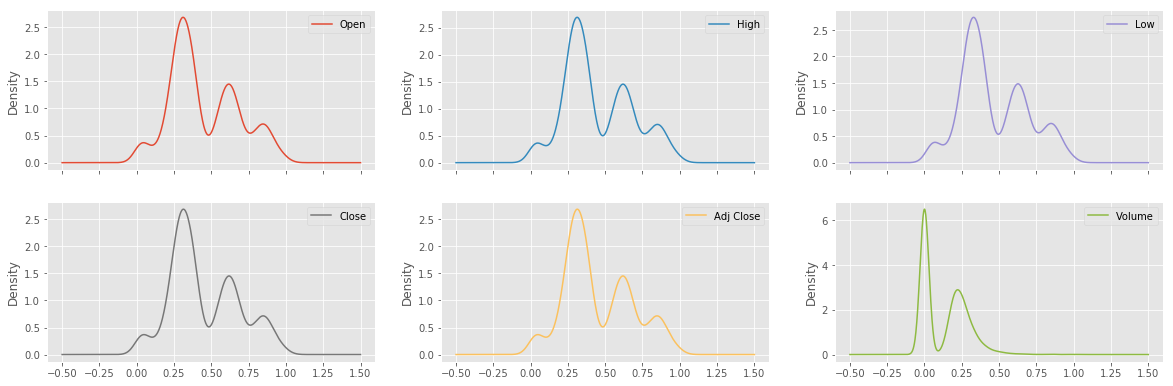

In [13]:
stock_norm_data = pd.DataFrame()

stock_norm_data['Open'] = (stock_data['Open'] - min(stock_data['Open'])) / (max(stock_data['Open']) - min(stock_data['Open']))
stock_norm_data['High'] = (stock_data['High'] - min(stock_data['High'])) / (max(stock_data['High']) - min(stock_data['High']))
stock_norm_data['Low'] = (stock_data['Low'] - min(stock_data['Low'])) / (max(stock_data['Low']) - min(stock_data['Low']))
stock_norm_data['Close'] = (stock_data['Close'] - min(stock_data['Close'])) / (max(stock_data['Close']) - min(stock_data['Close']))
stock_norm_data['Adj Close'] = (stock_data['Adj Close'] - min(stock_data['Adj Close'])) / (max(stock_data['Adj Close']) - min(stock_data['Adj Close']))
stock_norm_data['Volume'] = (stock_data['Volume'] - min(stock_data['Volume'])) / (max(stock_data['Volume']) - min(stock_data['Volume']))

stock_norm_data.plot(kind = 'density', subplots = True, sharex = True, layout = (3, 3), figsize = (20, 10))
plt.show()

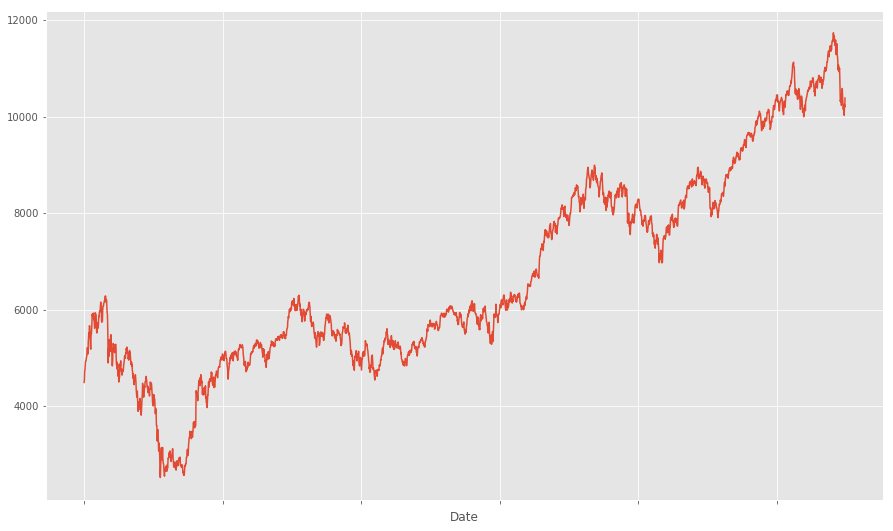

In [14]:
# Visualizing Adj Close price 
fig = plt.figure(figsize = (15, 9))
stock_data['Adj Close'].plot()
plt.show()
fig.savefig('Plots/Fig1_Nifty50_Adj_Close.png')

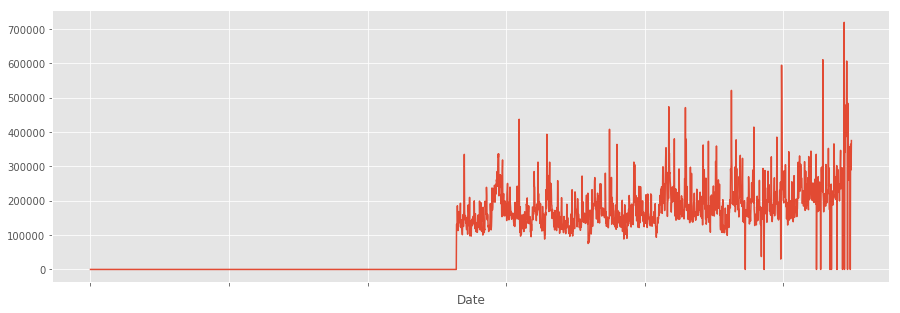

In [15]:
# Plotting total volumes traded over time 
fig = plt.figure(figsize = (15, 5))
stock_data['Volume'].plot()
plt.show()
#fig.savefig('Plots/Fig1_Nifty50_Volume.png')

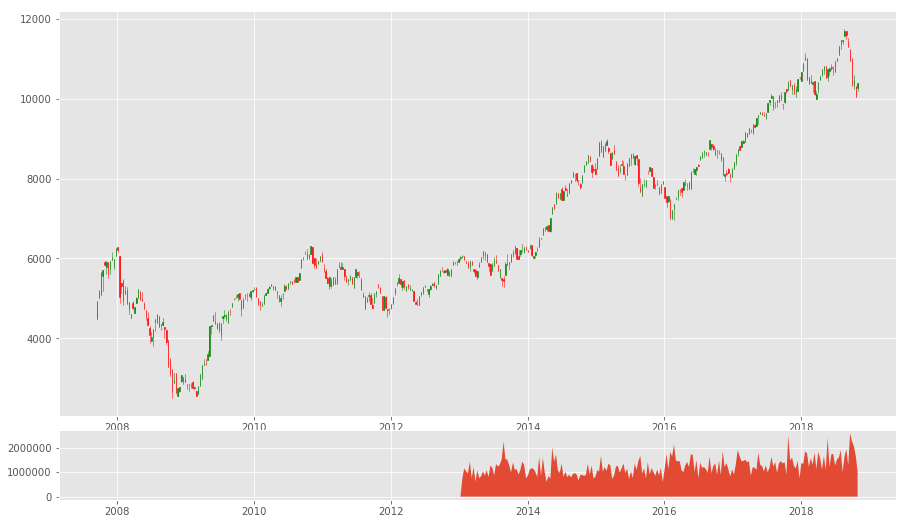

In [16]:
# Japenese Candlestick Plot ...

def plot_candlestick_ohlc():
    df = pd.read_csv('Data/nifty50.csv', parse_dates = True, index_col = 0)
    df_ohlc = df['Adj Close'].resample('10D').ohlc()
    df_volume = df['Volume'].resample('10D').sum()
    df_ohlc.reset_index(inplace = True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    fig = plt.figure(figsize = (15, 9))
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
    ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    plt.show()
    fig.savefig('Plots/Fig2_CandleStick_Plot.png')
    return
plot_candlestick_ohlc()

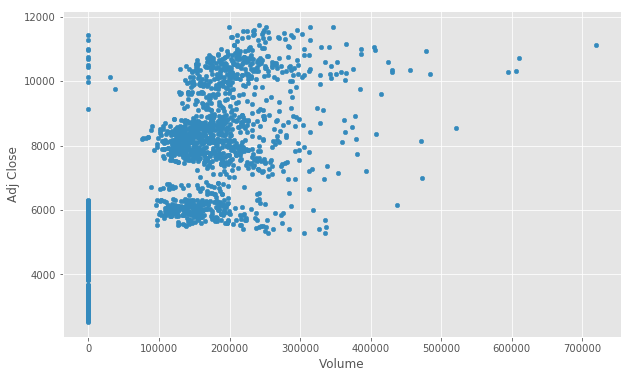

In [17]:
# Scatter plots 
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.plot.scatter(x = 'Volume', y = 'Adj Close', figsize = (10, 6))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97028f4400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9706825a20>]], dtype=object)

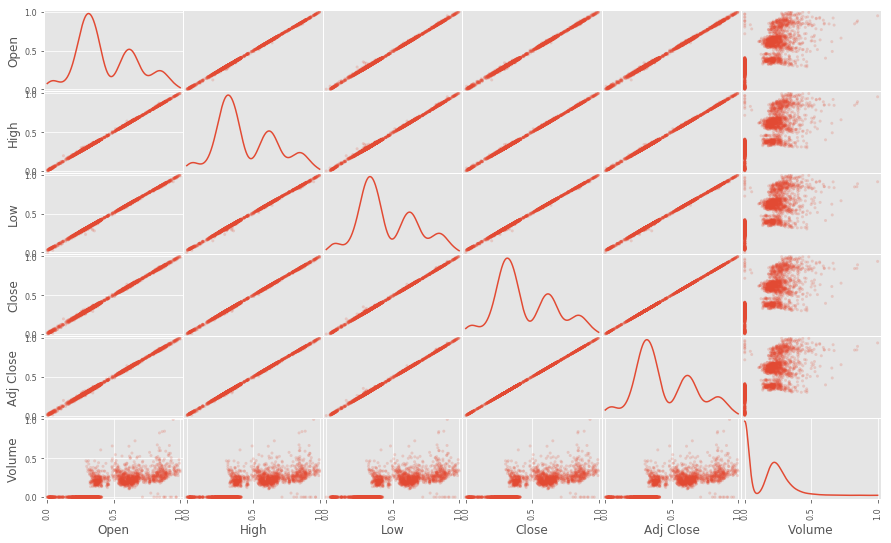

In [18]:
# Scatter Matrix 
from pandas.plotting import scatter_matrix 
scatter_matrix(stock_norm_data, alpha = 0.2, figsize = (15, 9), diagonal = 'kde')

In [19]:
# Percentage change, from one day to next ...
pct_data = stock_data.pct_change()
pct_data = pct_data.replace([np.inf, -np.inf], 0)
pct_data.fillna(0, inplace = True)

pct_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2007-09-18,-0.005389,0.000605,-0.000290,0.011469,0.011469,0.0
2007-09-19,0.012494,0.041127,0.015330,0.040946,0.040946,0.0
2007-09-20,0.040569,0.004611,0.037558,0.003212,0.003212,0.0
2007-09-21,0.003823,0.019923,0.002658,0.018957,0.018957,0.0


In [20]:
# Moving Average 
ma_days = [10, 20, 30]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    
    stock_data[column_name] = stock_data['Adj Close'].rolling(window=ma,center=False).mean()
    
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days
Date,,,,,,,,,
2018-10-25,10135.049805,10166.599609,10079.299805,10124.900391,10124.900391,0.0,10330.270020,10507.797461,10761.186654
2018-10-26,10122.349609,10128.849609,10004.549805,10030.000000,10030.000000,364300.0,10309.804981,10456.607471,10714.250000
2018-10-29,10078.099609,10275.299805,10020.349609,10250.849609,10250.849609,364400.0,10287.639941,10420.272461,10679.694987
2018-10-30,10239.400391,10285.099609,10175.349609,10198.400391,10198.400391,289800.0,10256.229981,10383.669971,10640.644987
2018-10-31,10209.549805,10396.000000,10105.099609,10386.599609,10386.599609,375000.0,10236.414941,10352.584961,10603.024967


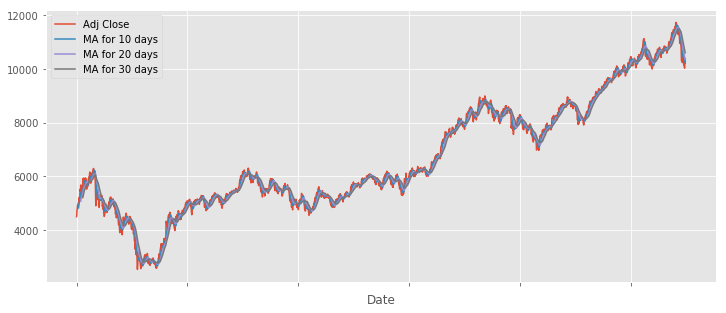

In [21]:
# Plotting moving averages 
stock_data[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False,figsize=(12,5))

In [22]:
# Feature relevance 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in list(pct_data.columns.values):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature 
    new_data = pct_data.drop(col, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(new_data, pct_data[col], test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    
    # Report the score of the prediction using the testing set 
    score = regressor.score(X_test, y_test)
    print("{} R^2 score : {:2f}".format(col, score))

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Open R^2 score : 0.501533
High R^2 score : 0.666461
Low R^2 score : 0.365344
Close R^2 score : 0.986006
Adj Close R^2 score : 0.986006
Volume R^2 score : -0.367031


Close has the highest score, hence it is best to use this to determine prediction. Volume has the lowest score, which makes it not so useful for prediction. 